In [ ]:
'''>>>>> start CodeP4.1F23
    V.P. Carey ME249, Fall 2023

Keras Neural Network Modeling '''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define meadian values of input variables
Dimed = 1
Qomed = 1
Xemed = 1
Twmed = 1

#create input data array
xraw = []

#xraw.append([ Di(m), qoflux (kW/m^2), exit quality, max wall temperature (deg C)])
xraw.append([0.008, 550, 0.525, 306.7])
xraw.append([0.008, 650, 0.525, 298.5])
xraw.append([0.008, 750, 0.525, 294.2])
xraw.append([0.008, 850, 0.525, 290.2])
xraw.append([0.008, 950, 0.524, 286.9])
xraw.append([0.008, 1050, 0.524, 284.1])
xraw.append([0.008, 1150, 0.525, 281.7])
xraw.append([0.008, 850, 0.524, 290.31])
xraw.append([0.008, 550, 0.734, 307.9])
xraw.append([0.008, 750, 0.735, 295.5])
xraw.append([0.008, 950, 0.735, 287.8])
xraw.append([0.008, 1050, 0.735, 285.0])
xraw.append([0.008, 1150, 0.735, 282.5])
xraw.append([0.008, 850, 0.734, 291.3])
xraw.append([0.008, 550,  0.945, 308.6])
xraw.append([0.008, 750, 0.945, 296.2])
xraw.append([0.008, 950, 0.945, 288.5])
xraw.append([0.008, 1150, 0.945, 283.1])
xraw.append([0.008, 850, 0.945, 291.9])
xraw.append([0.011, 550,  0.525, 328.0])
xraw.append([0.011, 750, 0.525, 311.2])
xraw.append([0.011, 950, 0.525, 300.8])
xraw.append([0.011, 1150, 0.525, 293.6])
xraw.append([0.011, 850, 0.525, 305.5])
xraw.append([0.011, 550, 0.735, 329.6])
xraw.append([0.011, 750, 0.735, 312.6])
xraw.append([0.011, 950, 0.735, 302.0])
xraw.append([0.011, 1050, 0.735, 299.4])
xraw.append([0.011, 1150, 0.735, 294.8])
xraw.append([0.011, 850, 0.735, 306.8])
xraw.append([0.011, 550,  0.945, 330.7])
xraw.append([0.011, 750, 0.945, 313.6])
xraw.append([0.011, 950, 0.944, 302.9])
xraw.append([0.011, 1150, 0.945, 295.6])
xraw.append([0.011, 850, 0.944, 307.7])
xraw.append([0.011, 700, 0.734, 324.7])
xraw.append([0.013, 550, 0.525, 342.2])
xraw.append([0.013, 750, 0.524,  322.3])
xraw.append([0.013, 950, 0.524, 310.0])
xraw.append([0.013, 1150, 0.525, 301.6])
xraw.append([0.013, 850, 0.524, 315.5])
xraw.append([0.013, 550, 0.734, 344.1])
xraw.append([0.013, 750, 0.735, 324.0])
xraw.append([0.013, 950, 0.735, 311.5])
xraw.append([0.013, 1050, 0.735, 306.3])
xraw.append([0.013, 1150, 0.735, 302.9])
xraw.append([0.013, 850, 0.734, 317.1])
xraw.append([0.013, 550, 0.945, 345.3])
xraw.append([0.013, 750, 0.944, 325.1])
xraw.append([0.013, 950, 0.944, 312.5])
xraw.append([0.013, 1150, 0.945, 303.9])
xraw.append([0.013, 850, 0.945, 318.2])


xraw = np.array(xraw)

#print(xraw)

# define meadian values of output variables
Mdmed = 1

#create input data array
yraw = []

#yraw.append([mdot (kg/s)])
yraw = [
    [0.06157],
    [0.07269],
    [0.08396],
    [0.09347],
    [0.10635],
    [0.11521],
    [0.1287],
    [0.09516],
    [0.04398],
    [0.05997],
    [0.07596],
    [0.08343],
    [0.0919],
    [0.06797],
    [0.0342],
    [0.04664],
    [0.05908],
    [0.0715],
    [0.05286],
    [0.0846],
    [0.1154],
    [0.1462],
    [0.177],
    [0.1308],
    [0.06047],
    [0.08246],
    [0.1044],
    [0.1134],
    [0.1264],
    [0.0934],
    [0.047],
    [0.06413],
    [0.08124],
    [0.09834],
    [0.072691],
    [0.087196],
    [0.10005],
    [0.13644],
    [0.17282],
    [0.2092],
    [0.15463],
    [0.07147],
    [0.09745],
    [0.12344],
    [0.13302],
    [0.1494],
    [0.11045],
    [0.05558],
    [0.0758],
    [0.09601],
    [0.1162],
    [0.0859]
]


yarray= np.array(yraw)
# print (yraw)

# Calculate the median for each column
#Di(m), qoflux (kW/m^2), exit quality, max wall temperature (deg C)
median_values_x = np.median(np.array(xraw), axis=0)
Dimed = median_values_x[0] #
Qomed = median_values_x[1] #
Xemed = median_values_x[2]
Twmed = median_values_x[3] #

#exit quality, max wall temperature (deg C)
median_values_y = np.median(np.array(yraw), axis=0)
Mdmed = median_values_y[0]

print("Median values for each column:", median_values_x, median_values_y)

xnorm = (xraw/median_values_x)
ynorm = (yraw/median_values_y)

print("Normalized xdata: \n", xnorm)
print("\n")
print("Normalized ydata: \n",ynorm)

Median values for each column: [1.100e-02 8.500e+02 7.350e-01 3.047e+02] [0.09265]
Normalized xdata: 
 [[0.72727273 0.64705882 0.71428571 1.00656383]
 [0.72727273 0.76470588 0.71428571 0.97965212]
 [0.72727273 0.88235294 0.71428571 0.96553988]
 [0.72727273 1.         0.71428571 0.95241221]
 [0.72727273 1.11764706 0.71292517 0.94158188]
 [0.72727273 1.23529412 0.71292517 0.93239252]
 [0.72727273 1.35294118 0.71428571 0.92451592]
 [0.72727273 1.         0.71292517 0.95277322]
 [0.72727273 0.64705882 0.99863946 1.01050213]
 [0.72727273 0.88235294 1.         0.96980637]
 [0.72727273 1.11764706 1.         0.94453561]
 [0.72727273 1.23529412 1.         0.93534624]
 [0.72727273 1.35294118 1.         0.92714145]
 [0.72727273 1.         0.99863946 0.95602232]
 [0.72727273 0.64705882 1.28571429 1.01279947]
 [0.72727273 0.88235294 1.28571429 0.97210371]
 [0.72727273 1.11764706 1.28571429 0.94683295]
 [0.72727273 1.35294118 1.28571429 0.9291106 ]
 [0.72727273 1.         1.28571429 0.95799147]
 [1.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
xarray, xval, yarray, yval = train_test_split(xnorm, ynorm, test_size=0.25, random_state=42)

# X_train and y_train will now have 75% of the data (training set)
# X_val and y_val will have the remaining 25% of the data (validation set)

In [ ]:
# define neural network model

#As seen below, we have created four dense layers.
#A dense layer is a layer in neural network that’s fully connected.
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case.
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.5, maxval=0.7)

#First model try
# model = keras.Sequential([
#     keras.layers.Dense(13, activation=K.elu, input_shape=[4],  kernel_initializer=initializer),
#     keras.layers.Dense(26, activation=K.elu,  kernel_initializer=initializer),
#     keras.layers.Dropout(0.05),
#     keras.layers.Dense(13, activation=K.elu, kernel_initializer=initializer),
#     keras.layers.Dropout(0.05),
#     keras.layers.Dense(1, kernel_initializer=initializer)
#   ])

#Second model try
# model = keras.Sequential([
#     keras.layers.Dense(6, activation=K.elu, input_shape=[4],  kernel_initializer=initializer),
#     keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
#     keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
#     keras.layers.Dropout(0.03),
#     keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
#     keras.layers.Dense(1,  kernel_initializer=initializer)
#   ])

#Third model try
model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[4],  kernel_initializer=initializer),
    keras.layers.Dense(13, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(26, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(1,  kernel_initializer=initializer)
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation.
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks.
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.00035)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [ ]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training.
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again.
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs.
#During model training, if all the batches of data are seen by the model once,
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss',
    mode='min',
    patience = 80,
    restore_best_weights = True,
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss',
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=800,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/800
2/2 [==============================] - 1s 12ms/step - loss: 0.0207
Epoch 2/800
2/2 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 3/800
2/2 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 4/800
2/2 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 5/800
2/2 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 6/800
2/2 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 7/800
2/2 [==============================] - 0s 7ms/step - loss: 0.0121
Epoch 8/800
2/2 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 9/800
2/2 [==============================] - 0s 7ms/step - loss: 0.0128
Epoch 10/800
2/2 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 11/800
2/2 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 12/800
2/2 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 13/800
2/2 [==============================] - 0s 10ms/

In [ ]:
# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.

# NOTE: If you get an error message when trying to run with the line
#        recon_model = tf.keras.models.load_model("best_model")
#        try running prediction calculations with model.predict() (as in the code for project 2)
#        with the line recon_model = tf.keras.models.load_model("best_model") removed.
#        That may avoid the error

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


2/2 [==============================] - 0s 11ms/step


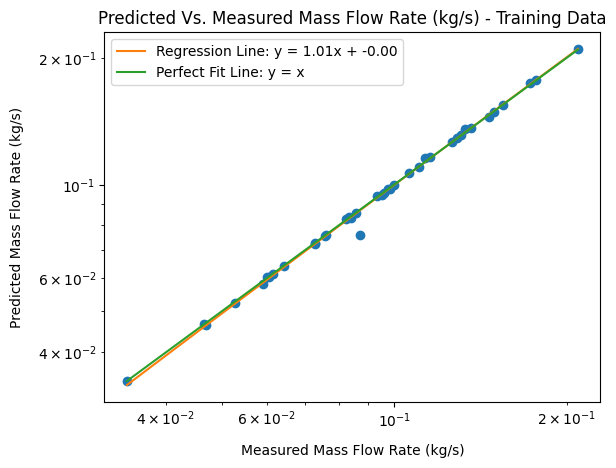

Mean Absolute Error between Predicted and Measured Mass Flow Rate (kg/s): 0.0007607001757193848

Mean Absolute Relative Error between Predicted and Measured Mass Flow Rate (kg/s): 0.008116582185359857



In [ ]:
import matplotlib.pyplot as plt

# Use model.predict to get all outputs at once
outputs = model.predict(xarray)

# Regression Line
m, b = np.polyfit(yarray[:, 0]*Mdmed, outputs[:, 0]*Mdmed, 1)
regress_input = np.linspace(np.min(yarray[:, 0])*Mdmed, np.max(yarray[:, 0])*Mdmed, 50)

# Create a Log-Log plot
plt.loglog(yarray[:, 0]*Mdmed, outputs[:, 0]*Mdmed, marker = 'o', linestyle = '')
plt.loglog(regress_input, m*(regress_input) + b, label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.loglog(regress_input, regress_input, label=f'Perfect Fit Line: y = x')

plt.title('Predicted Vs. Measured Mass Flow Rate (kg/s) - Training Data')
plt.xlabel('Measured Mass Flow Rate (kg/s)', labelpad = 10)
plt.ylabel('Predicted Mass Flow Rate (kg/s)', labelpad = 10)
plt.legend()

plt.show()

### Output Mean Abs Error Value ###
diff = np.abs((yarray[:, 0]*Mdmed) - (outputs[:, 0]*Mdmed))
mae = np.mean(diff)
print("Mean Absolute Error between Predicted and Measured Mass Flow Rate (kg/s): " + str(mae) + "\n")

### Output Mean Abs Relative Error Value ###
diff = np.abs(((yarray[:, 0]*Mdmed) - (outputs[:, 0]*Mdmed)) / (yarray[:, 0]*Mdmed))
mae = np.mean(diff)
print("Mean Absolute Relative Error between Predicted and Measured Mass Flow Rate (kg/s): " + str(mae) + "\n")

1/1 [==============================] - 0s 22ms/step


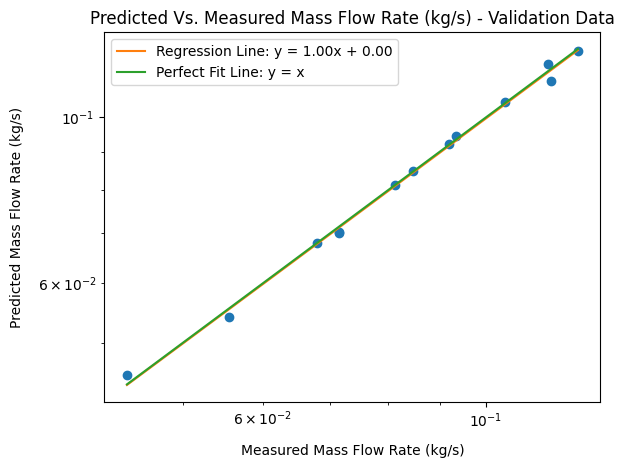

Mean Absolute Error between Predicted and Measured Mass Flow Rate (kg/s): 0.0011568573664701902

Mean Absolute Relative Error between Predicted and Measured Mass Flow Rate (kg/s): 0.01384566523793725



In [ ]:
# Use model.predict to get all outputs at once
outputs = model.predict(xval)

# Regression Line
m, b = np.polyfit(yval[:, 0]*Mdmed, outputs[:, 0]*Mdmed, 1)
regress_input = np.linspace(np.min(yval[:, 0])*Mdmed, np.max(yval[:, 0])*Mdmed, 50)

# Create a Log-Log plot
plt.loglog(yval[:, 0]*Mdmed, outputs[:, 0]*Mdmed, marker = 'o', linestyle = '')
plt.loglog(regress_input, m*(regress_input) + b, label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.loglog(regress_input, regress_input, label=f'Perfect Fit Line: y = x')

plt.title('Predicted Vs. Measured Mass Flow Rate (kg/s) - Validation Data')
plt.xlabel('Measured Mass Flow Rate (kg/s)', labelpad = 10)
plt.ylabel('Predicted Mass Flow Rate (kg/s)', labelpad = 10)
plt.legend()

plt.show()

### Output Mean Abs Error Value ###
diff = np.abs((yval[:, 0]*Mdmed) - (outputs[:, 0]*Mdmed))
mae = np.mean(diff)
print("Mean Absolute Error between Predicted and Measured Mass Flow Rate (kg/s): " + str(mae) + "\n")

### Output Mean Abs Relative Error Value ###
diff = np.abs(((yval[:, 0]*Mdmed) - (outputs[:, 0]*Mdmed)) / (yval[:, 0]*Mdmed))
mae = np.mean(diff)
print("Mean Absolute Relative Error between Predicted and Measured Mass Flow Rate (kg/s): " + str(mae) + "\n")

4/4 [==============================] - 0s 11ms/step


Text(0.5, 1.0, 'Water Mass Flow Rate vs Incident Solar Flux $q_o^{\\prime\\prime}$')

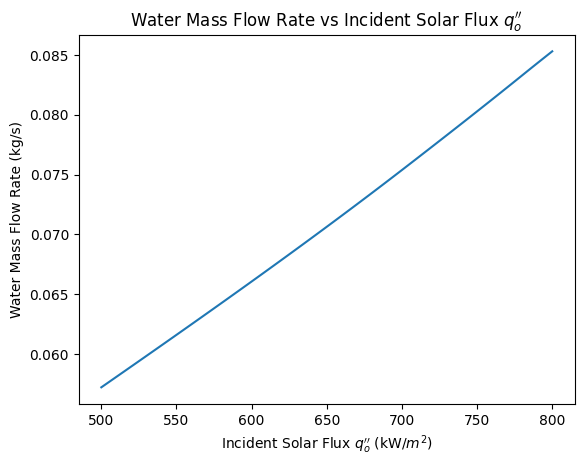

In [ ]:
test_Di = .01/Dimed
test_Qo = np.linspace(500/Qomed, 800/Qomed, 100)
test_Xe = .7/Xemed
test_Tw = 300/Twmed

input_data = np.column_stack((np.full(100, test_Di), test_Qo, np.full(100, test_Xe), np.full(100, test_Tw)))
# print(input_data.shape, input_data[:5])

outputs = model.predict(input_data)

plt.plot(test_Qo*Qomed, outputs*Mdmed)
plt.xlabel('Incident Solar Flux $q_o^{\prime\prime}$ (kW/$m^2$)')
plt.ylabel('Water Mass Flow Rate (kg/s)')
plt.title('Water Mass Flow Rate vs Incident Solar Flux $q_o^{\prime\prime}$')